<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Regression Trees**


Estimated time needed: **20** minutes


In this lab you will learn how to implement regression trees using ScikitLearn. We will show what parameters are important, how to train a regression tree, and finally how to determine our regression trees accuracy.


## Objectives


After completing this lab you will be able to:


*   Train a Regression Tree
*   Evaluate a Regression Trees Performance


***


## Setup


For this lab, we are going to be using Python and several Python libraries. Some of these libraries might be installed in your lab environment or in SN Labs. Others may need to be installed by you. The cells below will install these libraries when executed.


In [ ]:
# Install libraries not already in the environment using pip
#!pip install pandas==1.3.4
#!pip install sklearn==0.20.1

In [1]:
# Pandas will allow us to create a dataframe of the data so it can be used and manipulated
import pandas as pd
# Regression Tree Algorithm
from sklearn.tree import DecisionTreeRegressor
# Split our data into a training and testing data
from sklearn.model_selection import train_test_split

## About the Dataset


Imagine you are a data scientist working for a real estate company that is planning to invest in Boston real estate. You have collected information about various areas of Boston and are tasked with created a model that can predict the median price of houses for that area so it can be used to make offers.

The dataset had information on areas/towns not individual houses, the features are

CRIM: Crime per capita

ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxides concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to ﬁve Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property-tax rate per $10,000

PTRAIO: Pupil-teacher ratio by town

LSTAT: Percent lower status of the population

MEDV: Median value of owner-occupied homes in $1000s


## Read the Data


Lets read in the data we have downloaded


In [11]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/real_estate_data.csv")

In [12]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


Now lets learn about the size of our data, there are 506 rows and 13 columns


In [13]:
data.shape

(506, 13)

Most of the data is valid, there are rows with missing values which we will deal with in pre-processing


In [14]:
data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

## Data Pre-Processing


First lets drop the rows with missing values because we have enough data in our dataset


In [15]:
data.dropna(inplace=True)

Now we can see our dataset has no missing values


In [16]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [17]:
data.shape

(394, 13)

Lets split the dataset into our features and what we are predicting (target)


In [18]:
X = data.drop(columns=["MEDV"])
Y = data["MEDV"]

In [19]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21


In [20]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64

Finally lets split our data into a training and testing dataset using `train_test_split` from `sklearn.model_selection`


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=1)

## Create Regression Tree


Regression Trees are implemented using `DecisionTreeRegressor` from `sklearn.tree`

The important parameters of `DecisionTreeRegressor` are

`criterion`: {"mse", "friedman_mse", "mae", "poisson"} - The function used to measure error

`max_depth` - The max depth the tree can be

`min_samples_split` - The minimum number of samples required to split a node

`min_samples_leaf` - The minimum number of samples that a leaf can contain

`max_features`: {"auto", "sqrt", "log2"} - The number of feature we examine looking for the best one, used to speed up training


First lets start by creating a `DecisionTreeRegressor` object, setting the `criterion` parameter to `mse` for Mean Squared Error


In [22]:
regression_tree = DecisionTreeRegressor(criterion = "mse")

## Training


Now lets train our model using the `fit` method on the `DecisionTreeRegressor` object providing our training data


In [23]:
regression_tree.fit(X_train, Y_train)

/Users/zhenqiangzeng/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse')

## Evaluation


To evaluate our dataset we will use the `score` method of the `DecisionTreeRegressor` object providing our testing data, this number is the $R^2$ value which indicates the coefficient of determination


In [24]:
regression_tree.score(X_test, Y_test)

0.7473206764971578

We can also find the average error in our testing set which is the average error in median home value prediction


In [25]:
prediction = regression_tree.predict(X_test)

print("$",(prediction - Y_test).abs().mean()*1000)

$ 3091.1392405063293


In [27]:
print(prediction)
print(Y_test)

[23.9 23.3 23.2 13.4 43.1 50.  29.1 18.6 27.5 21.2 15.6 19.4 10.9 44.
 14.1 25.3 21.4 24.6 15.  24.  29.6 19.1 13.8 22.5 15.   7.4 23.3  5.
 50.  16.2 14.1 23.7 29.4 21.7 34.9 18.8 50.  11.5 33.4 13.1 30.3 24.6
 13.1 21.7 18.1 50.  18.8 23.3 24.3 19.5 21.2 29.4 24.8 20.5 15.1 26.7
 10.8 18.2 13.5 14.6  8.8 22.2 34.9 21.2 32.  23.3  5.  18.2 10.9 14.4
 25.  43.8 15.  23.  13.9 12.1 18.2 19.5 19.3]
96     21.4
289    24.8
456    12.7
143    15.6
267    50.0
       ... 
27     14.8
379    10.2
17     17.5
106    19.5
71     21.7
Name: MEDV, Length: 79, dtype: float64


## Excercise


Train a regression tree using the `criterion` `mae` then report its $R^2$ value and average error


In [31]:
regression_tree_mae=DecisionTreeRegressor(criterion='mae')
regression_tree_mae.fit(X_train,Y_train)
print(regression_tree_mae.score(X_test,Y_test))

prediction1=regression_tree_mae.predict(X_test)
print("$",(prediction1 - Y_test).abs().mean()*1000)

0.765835250318506
$ 2981.0126582278476


/Users/zhenqiangzeng/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


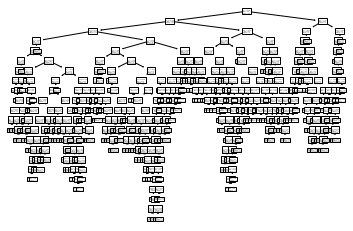

In [37]:
import sklearn.tree as tree
from sklearn import metrics
import matplotlib.pyplot as plt
tree.plot_tree(regression_tree_mae)
plt.show()


<details><summary>Click here for the solution</summary>

```python
regression_tree = DecisionTreeRegressor(criterion = "mae")

regression_tree.fit(X_train, Y_train)

print(regression_tree.score(X_test, Y_test))

prediction = regression_tree.predict(X_test)

print("$",(prediction - Y_test).abs().mean()*1000)

```

</details>


## Authors


Azim Hirjani


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2020-07-20        | 0.2     | Azim       | Modified Multiple Areas |
| 2020-07-17        | 0.1     | Azim       | Created Lab Template    |


Copyright © 2020 IBM Corporation. All rights reserved.
